### HIGH DIMENSIONAL LINEAR REGRESSION

In [1]:
import d2l 
from mxnet import *
from mxnet.gluon import nn
npx.set_np()

In [2]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5

true_w, true_b = np.ones((num_inputs, 1)) * 0.01, 0.05

train_data = d2l.synthetic_data(true_w, true_b, n_train)

In [11]:
train_iter = d2l.load_array(train_data, batch_size)

test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train= False)

### INITIALIZATION PARAMETERS

In [4]:
def init_params():
    
    w = np.random.normal(scale=1, size=(num_inputs, 1))
    b = np.zeros(1)
    w.attach_grad()
    b.attach_grad()
    
    return [w,b]

### DEF PENALTY

In [5]:
def l2_penalty(w):
    return (w**2).sum() / 2

### DEF TRAIN AND TEST FUNCTION

In [6]:
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel = 'epochs', ylabel = 'loss', yscale='log', 
                           xlim=[1, num_epochs], legend=['train', 'test'])
    
    for epoch in range(1, num_epochs+1):
        for X, y in train_iter:
            with autograd.record():
                l = loss(net(X), y) + lambd * l2_penalty(w)
                
            l.backward()
            d2l.sgd([w,b], lr, batch_size)
            
        if epoch % 5 == 0:
            animator.add(epoch, (d2l.evaluate_loss(net, train_iter, loss),
                                d2l.evaluate_loss(net, test_iter, loss)))
    
    print('l1 norm of w:', np.abs(w).sum() )

l1 norm of w: 152.89662


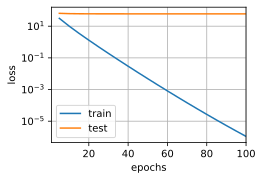

In [7]:
train(lambd = 0)

### USING WEIGHT DECAY

l1 norm of w: 4.2483473


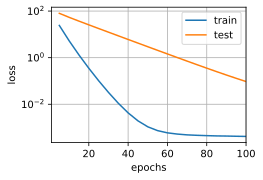

In [8]:
train(lambd =3)

### CONCISE IMPLEMENTATION

In [13]:
def train_gluon(wd):
    net = nn.Sequential()
    net.add(nn.Dense(1))
    net.initialize(init.Normal(sigma=1))
    loss = gluon.loss.L2Loss()
    num_epochs, lr = 100, 0.03
    
    trainer = gluon.Trainer(net.collect_params(), 'sgd',
                           {'learning_rate': lr, 'wd': wd})
    
    net.collect_params('.*bias').setattr('wd_mult', 0)
    
    animator = d2l.Animator(xlabel = 'epochs', ylabel = 'loss', yscale= 'log', 
                           xlim= [1, num_epochs], legend= ['train', 'test'])
    
    for epoch in range(1, num_epochs+1):
        for X, y in train_iter:
            with autograd.record():
                l = loss(net(X), y)
            l.backward()
            
            trainer.step(batch_size)
            
        if epoch % 5 == 0:
            animator.add(epoch, (d2l.evaluate_loss(net, train_iter, loss),
                                d2l.evaluate_loss(net, test_iter, loss)))
    print('l1 norm of w:', np.abs(net[0].weight.data()).sum())

l1 norm of w: 148.37001


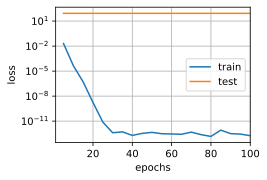

In [14]:
train_gluon(0)

l1 norm of w: 0.30342233


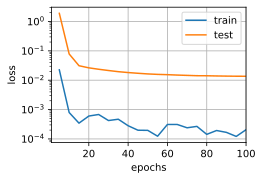

In [15]:
train_gluon(3)